<a href="https://colab.research.google.com/github/zzoeys/freecakefridays/blob/main/preparing_georgia_county_shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the required libraries.

In [ ]:
!pip install descartes
!pip install geopandas
!pip install matplotlib
!pip install pandas

     |████████████████████████████████| 1.0 MB 15.4 MB/s 
     |████████████████████████████████| 15.4 MB 53.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.0 MB/s 


Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

The shapefile consists of the boundaries for every state of the United States. 

In [5]:
geoData = "tl_2020_us_county.shp"
map_geo = gpd.read_file(geoData)
map_geo.head()

STATEFP  ...                                           geometry
0      31  ...  POLYGON ((-97.01952 42.00410, -97.01952 42.004...
1      53  ...  POLYGON ((-123.43639 46.23820, -123.44759 46.2...
2      35  ...  POLYGON ((-104.56739 33.99757, -104.56772 33.9...
3      31  ...  POLYGON ((-96.91075 40.78494, -96.91075 40.790...
4      31  ...  POLYGON ((-98.27367 40.08940, -98.27367 40.089...

[5 rows x 18 columns]

As our exploration focuses on Georgia, only Georgia's data is extracted. This is identified by '13' in the 'STATEFP' column.

In [7]:
# Georgia is identified by '13' in the 'STATEFP' column of the geodataframe. 
county_geo=map_geo.loc[map_geo['STATEFP']=='13']
county_geo['NAME'] = county_geo['NAME'].str.upper()
county_geo.head()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


STATEFP  ...                                           geometry
15       13  ...  POLYGON ((-82.44998 33.34051, -82.45000 33.340...
52       13  ...  POLYGON ((-81.91012 31.34722, -81.90993 31.347...
53       13  ...  POLYGON ((-84.24837 33.07856, -84.24837 33.079...
82       13  ...  POLYGON ((-85.24134 34.41552, -85.24124 34.415...
101      13  ...  POLYGON ((-84.56317 31.77060, -84.57351 31.770...

[5 rows x 18 columns]

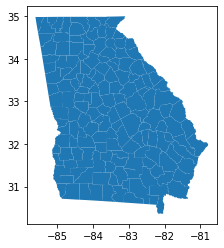

In [8]:
county_geo.plot()

This step downloads the prepared geodataframe as a shapefile with only the county boundaries in Georgia. 

In [ ]:
county_geo.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

county_geo.to_file('georgia_county.shp', driver='ESRI Shapefile')